In [24]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [25]:
#Data set from 

data =  np.array([ [42.8 , 40.0,  37]
,[63.5 , 93.5 , 50]
,[37.5 , 35.5 , 34]
,[39.5 , 30.0 , 36]
,[45.5  ,52.0 , 43]
,[38.5  ,17.0 , 28]
,[43.0  ,38.5 , 37]
,[22.5  , 8.5 , 20]
,[37.0  ,33.0 , 34]
,[23.5  , 9.5 , 30]
,[33.0  ,21.0 , 38]
,[58.0 ,79.0, 47]])

data


array([[42.8, 40. , 37. ],
       [63.5, 93.5, 50. ],
       [37.5, 35.5, 34. ],
       [39.5, 30. , 36. ],
       [45.5, 52. , 43. ],
       [38.5, 17. , 28. ],
       [43. , 38.5, 37. ],
       [22.5,  8.5, 20. ],
       [37. , 33. , 34. ],
       [23.5,  9.5, 30. ],
       [33. , 21. , 38. ],
       [58. , 79. , 47. ]])

In [26]:
X = data[:, :2]
y = data[:, 2]
X

array([[42.8, 40. ],
       [63.5, 93.5],
       [37.5, 35.5],
       [39.5, 30. ],
       [45.5, 52. ],
       [38.5, 17. ],
       [43. , 38.5],
       [22.5,  8.5],
       [37. , 33. ],
       [23.5,  9.5],
       [33. , 21. ],
       [58. , 79. ]])

In [27]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma


    # =========================== YOUR CODE HERE =====================

    
    # ================================================================
    return X_norm, mu, sigma

In [28]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [40.35833333 38.125     ]
Computed standard deviation: [11.42748575 24.94838422]


In [30]:
m = y.size
X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [31]:
X

array([[ 1.        ,  0.21366613,  0.07515517],
       [ 1.        ,  2.02508821,  2.21958262],
       [ 1.        , -0.25012793, -0.10521723],
       [ 1.        , -0.0751113 , -0.32567239],
       [ 1.        ,  0.44993858,  0.55614824],
       [ 1.        , -0.16261962, -0.84674822],
       [ 1.        ,  0.23116779,  0.01503103],
       [ 1.        , -1.56275262, -1.18745165],
       [ 1.        , -0.29388208, -0.20542413],
       [ 1.        , -1.47524431, -1.14736889],
       [ 1.        , -0.64391534, -0.6864172 ],
       [ 1.        ,  1.54379249,  1.63838266]])

In [44]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    predictions = X.dot(theta)
    square_err = (predictions-y)**2
    J = 1/(2*m) * np.sum(square_err)
    
    # ==================================================================
    return J


In [45]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        predictions = X.dot(theta)
        step = np.dot(X.transpose(), (predictions - y))
        theta = theta - alpha * 1/m * step
        
        J_history.append(computeCostMulti(X,y,theta))

        # =====================================================================

    return theta, J_history

Text(0, 0.5, 'Cost J')

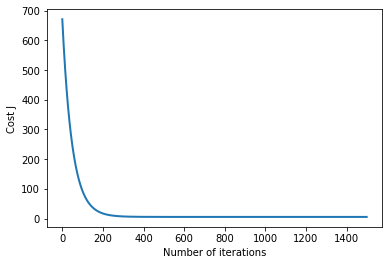

In [46]:
# initialize fitting parameters
theta = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [47]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

theta

array([36.16665641,  3.06632196,  4.10949863])

In [57]:
#Uses machine learning to predict catheter length given a height and weight

Height = 80
Weight = 100

x_sample = featureNormalize(np.array([Height, Weight]))[0]
x_sample=np.append(np.ones(1),x_sample)
prediction = x_sample.dot(theta.transpose())
print(f"Predicted length of catheter is: {prediction}")

Predicted length of catheter is: 37.20983307519903
